In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [237]:
df = pd.read_csv(filepath_or_buffer= "Extract_Dataset.csv") 
df

,Unnamed: 0,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,0,Untap,in.untap,Entertainment,3.9,68.0,"10,000+",10000.0,10291,True,...,https://untap.in,hello@untap.in,"Nov 2, 2020","Nov 02, 2020",Everyone,NaN,False,False,False,2021-06-16 11:24:00
1,1,Green Meadows,com.ooweboowebengineers.greenmeadows,Lifestyle,0.0,0.0,50+,50.0,90,True,...,http://ooweboo.co.za,ray@ooweboo.co.za,"May 29, 2017","May 29, 2017",Everyone,http://appmc2.net/privacy?company=OOWEBOO%20We...,False,False,False,2021-06-16 10:54:34
2,2,YG SELECT,com.makeshop.powerapp.ygnext,Shopping,4.3,918.0,"100,000+",100000.0,135038,True,...,http://www.ygeshop.com,app.ygselect@gmail.com,"Jan 20, 2016","May 12, 2021",Everyone,http://www.ygeshop.com/m/privacy.html,True,False,False,2021-06-16 02:21:54
3,3,Vinca Wealth,com.bag4wealth,Finance,5.0,6.0,50+,50.0,53,True,...,https://bag4wealth.com,acmatics.app@gmail.com,"Jun 30, 2020","May 11, 2021",Everyone,https://bag4wealth.com/finnsys/app/privacy.php,False,False,False,2021-06-16 01:29:59
4,4,Drink recipes,com.drinks.recipes,Food & Drink,4.3,830.0,"100,000+",100000.0,142498,True,...,http://cookwithlove.biz/,andrei.nazarco@gmail.com,"May 20, 2014","Jul 13, 2020",Everyone,http://cookwithlove.biz/privacy_policy/drink_r...,True,False,False,2021-06-16 08:43:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,Deep Memorial Public School,com.edunext.dmps,Education,4.3,142.0,"1,000+",1000.0,2490,True,...,http://www.edunexttechnologies.com,edunexttech@gmail.com,"Mar 4, 2016","Aug 26, 2020",Everyone,http://www.edunexttechnologies.com/terms-and-c...,False,False,False,2021-06-16 00:56:34
9996,9996,Anchored Sins,com.goc.anchoredsins3D,Role Playing,NaN,NaN,5+,5.0,8,True,...,https://www.gearoverclocked.com/projects,gearoverclocked@gmail.com,NaN,"Jan 03, 2020",Teen,NaN,False,False,False,2021-06-16 02:44:16
9997,9997,설운도 트로트 노래모음,korea.singer.sulundo,Music & Audio,5.0,9.0,"1,000+",1000.0,1035,True,...,http://israng.co.kr,parkhanye28@gmail.com,"Apr 23, 2020","Feb 03, 2021",Teen,https://docs.google.com/document/d/1C6-LdIQzH7...,True,False,False,2021-06-16 12:40:44
9998,9998,Coq,fr.enfantdoudou.coq,Entertainment,0.0,0.0,500+,500.0,522,True,...,NaN,pridgua@gmail.com,"Apr 16, 2020","Apr 16, 2020",Everyone,https://www.ftc.gov/tips-advice/business-cente...,True,False,False,2021-06-16 12:06:11


We can see that there is an index column called Unnamed, we need to make the first column index the primary index

In [238]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Untap,in.untap,Entertainment,3.9,68.0,"10,000+",10000.0,10291,True,0.0,...,https://untap.in,hello@untap.in,"Nov 2, 2020","Nov 02, 2020",Everyone,NaN,False,False,False,2021-06-16 11:24:00
1,Green Meadows,com.ooweboowebengineers.greenmeadows,Lifestyle,0.0,0.0,50+,50.0,90,True,0.0,...,http://ooweboo.co.za,ray@ooweboo.co.za,"May 29, 2017","May 29, 2017",Everyone,http://appmc2.net/privacy?company=OOWEBOO%20We...,False,False,False,2021-06-16 10:54:34
2,YG SELECT,com.makeshop.powerapp.ygnext,Shopping,4.3,918.0,"100,000+",100000.0,135038,True,0.0,...,http://www.ygeshop.com,app.ygselect@gmail.com,"Jan 20, 2016","May 12, 2021",Everyone,http://www.ygeshop.com/m/privacy.html,True,False,False,2021-06-16 02:21:54
3,Vinca Wealth,com.bag4wealth,Finance,5.0,6.0,50+,50.0,53,True,0.0,...,https://bag4wealth.com,acmatics.app@gmail.com,"Jun 30, 2020","May 11, 2021",Everyone,https://bag4wealth.com/finnsys/app/privacy.php,False,False,False,2021-06-16 01:29:59
4,Drink recipes,com.drinks.recipes,Food & Drink,4.3,830.0,"100,000+",100000.0,142498,True,0.0,...,http://cookwithlove.biz/,andrei.nazarco@gmail.com,"May 20, 2014","Jul 13, 2020",Everyone,http://cookwithlove.biz/privacy_policy/drink_r...,True,False,False,2021-06-16 08:43:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Deep Memorial Public School,com.edunext.dmps,Education,4.3,142.0,"1,000+",1000.0,2490,True,0.0,...,http://www.edunexttechnologies.com,edunexttech@gmail.com,"Mar 4, 2016","Aug 26, 2020",Everyone,http://www.edunexttechnologies.com/terms-and-c...,False,False,False,2021-06-16 00:56:34
9996,Anchored Sins,com.goc.anchoredsins3D,Role Playing,NaN,NaN,5+,5.0,8,True,0.0,...,https://www.gearoverclocked.com/projects,gearoverclocked@gmail.com,NaN,"Jan 03, 2020",Teen,NaN,False,False,False,2021-06-16 02:44:16
9997,설운도 트로트 노래모음,korea.singer.sulundo,Music & Audio,5.0,9.0,"1,000+",1000.0,1035,True,0.0,...,http://israng.co.kr,parkhanye28@gmail.com,"Apr 23, 2020","Feb 03, 2021",Teen,https://docs.google.com/document/d/1C6-LdIQzH7...,True,False,False,2021-06-16 12:40:44
9998,Coq,fr.enfantdoudou.coq,Entertainment,0.0,0.0,500+,500.0,522,True,0.0,...,NaN,pridgua@gmail.com,"Apr 16, 2020","Apr 16, 2020",Everyone,https://www.ftc.gov/tips-advice/business-cente...,True,False,False,2021-06-16 12:06:11


### Data Dictionnary
This is a data dictionnary for the project. It contains all the information about the dataset used to train and test the model.

App Name:
    - object 
    - The name of the application on the Google play store 
    - 
App Id: 
    - object
    - The application have an unique identifiers
    -  
Category: 
    - object
    - The application belong to a specific category 
    - 
Rating: 
    - float64
    -  This is the average rating for an application  
    - 
Rating Count:
    - float64
    - the number of person that rate the application   
    - 
Installs:
    - object
    -  the approximate number of install of the app
    -            
Minimum Installs:
    - float64
    -   
    -    
Maximum Installs
    - int64  
    -   
    -    
Free: 
    - bool
    - The application doesnt cost 
    -                 
Price:
    - float64
    -   The cost of the mobile application 
    -               
Currency:
    - object
    - The currency in which the price of the mobile application is listed
    -           
Size:
    - object
    - The size of the mobile application in terms of storage space 
    -               
Minimum Android:
    - object
    -  The minimum version of the Android operating system required to run the mobile application.
    -      
Developer Id:
    - object
    -  The developer has a unique identifier
    -         
Developer Website:
    - object
    - The website associated with the developer or company behind the mobile application 
    -   
Developer Email: 
    - object
    -  The email address of the developer or company responsible for the mobile application.
    -     
Released:     
    - object
    -   The date when the mobile application was initially released on the Google Play Store.
    -           
Last Updated: 
    - object
    -  The date when the mobile application was last updated 
    -       
Content Rating:
    - object
    - The content rating for which the mobile application is suitable
    -      
Privacy Policy:
    - object
    -  A link to the privacy policy associated with the mobile application.
    -      
Editors Choice:
    - bool
    -  the mobile application has been selected as an "Editor's Choice" on the Google Play Store.
    -   
Scraped Time: 
    - object
    -  The date where the data was collected in the google play store
    -        

### Step 1: Check datatypes and format

In [239]:
df.shape

(10000, 24)

This DataFrame contains 10000 rows and 24 columns

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   App Name           10000 non-null  object 
 1   App Id             10000 non-null  object 
 2   Category           10000 non-null  object 
 3   Rating             9906 non-null   float64
 4   Rating Count       9906 non-null   float64
 5   Installs           9999 non-null   object 
 6   Minimum Installs   9999 non-null   float64
 7   Maximum Installs   10000 non-null  int64  
 8   Free               10000 non-null  bool   
 9   Price              10000 non-null  float64
 10  Currency           9999 non-null   object 
 11  Size               9999 non-null   object 
 12  Minimum Android    9969 non-null   object 
 13  Developer Id       10000 non-null  object 
 14  Developer Website  6628 non-null   object 
 15  Developer Email    10000 non-null  object 
 16  Released           9694

We can that see there are a mixture of numerical and categorical columns. There is lots of "object" type which corresponds to categorical data. We can also see that there is boolean data that might be some binary type columns which could be True/False or 0/1 which are captured as "yes"/"no". Finally, we see that there are some columns missing data in Rating, Rating Count ,Installs, Minimum Installs, Currency, Size, Minimum Android, Developer Website (this columns has the more null value compare to the other columns), Released and Privacy Policy.

### Dropping Columns 

In [241]:
df.drop(columns = ['Last Updated','App Name','Size','Minimum Android','Minimum Installs', 'App Id', 'Currency', 'Developer Website', 'Privacy Policy', 'Scraped Time', 'Developer Email', 'Developer Id', 'Installs', 'Released', 'Maximum Installs'], inplace= True)

C:\Users\lelon\AppData\Local\Temp\ipykernel_29616\3403074033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Last Updated','App Name','Size','Minimum Android','Minimum Installs', 'App Id', 'Currency', 'Developer Website', 'Privacy Policy', 'Scraped Time', 'Developer Email', 'Developer Id', 'Installs', 'Released', 'Maximum Installs'], inplace= True)


### Checking for duplicate data

In [242]:
df.duplicated().sum()

4553

In [243]:
df.duplicated().value_counts()

False    5447
True     4553
dtype: int64

In [244]:
df.T.duplicated().sum()

0

According to this command there is no ducplicate information

### Dealing with missing data

In [245]:
df.isna().sum()

Category             0
Rating              94
Rating Count        94
Free                 0
Price                0
Content Rating       0
Ad Supported         0
In App Purchases     0
Editors Choice       0
dtype: int64

In [246]:
df.isna().sum()/df.shape[0]*100

Category            0.00
Rating              0.94
Rating Count        0.94
Free                0.00
Price               0.00
Content Rating      0.00
Ad Supported        0.00
In App Purchases    0.00
Editors Choice      0.00
dtype: float64

we can see that 0.94% of values are missing for the Rating and Rating Count columns.

In [247]:
df.dropna(inplace = True)

C:\Users\lelon\AppData\Local\Temp\ipykernel_29616\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9906 non-null   object 
 1   Rating            9906 non-null   float64
 2   Rating Count      9906 non-null   float64
 3   Free              9906 non-null   bool   
 4   Price             9906 non-null   float64
 5   Content Rating    9906 non-null   object 
 6   Ad Supported      9906 non-null   bool   
 7   In App Purchases  9906 non-null   bool   
 8   Editors Choice    9906 non-null   bool   
dtypes: bool(4), float64(3), object(2)
memory usage: 503.0+ KB


### Changing some values into binary

In [249]:
df

,Category,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,True,0.0,Everyone,False,False,False
1,Lifestyle,0.0,0.0,True,0.0,Everyone,False,False,False
2,Shopping,4.3,918.0,True,0.0,Everyone,True,False,False
3,Finance,5.0,6.0,True,0.0,Everyone,False,False,False
4,Food & Drink,4.3,830.0,True,0.0,Everyone,True,False,False
...,...,...,...,...,...,...,...,...,...
9994,Music,0.0,0.0,True,0.0,Everyone,False,False,False
9995,Education,4.3,142.0,True,0.0,Everyone,False,False,False
9997,Music & Audio,5.0,9.0,True,0.0,Teen,True,False,False
9998,Entertainment,0.0,0.0,True,0.0,Everyone,True,False,False


In [250]:
df["Free"] = df["Free"].astype(int)
df["In App Purchases"] = df["In App Purchases"].astype(int)
df["Editors Choice"] = df["Editors Choice"].astype(int)
df["Ad Supported"] = df["Ad Supported"].astype(int)

C:\Users\lelon\AppData\Local\Temp\ipykernel_29616\860087706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Free"] = df["Free"].astype(int)
C:\Users\lelon\AppData\Local\Temp\ipykernel_29616\860087706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["In App Purchases"] = df["In App Purchases"].astype(int)
C:\Users\lelon\AppData\Local\Temp\ipykernel_29616\860087706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9906 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          9906 non-null   object 
 1   Rating            9906 non-null   float64
 2   Rating Count      9906 non-null   float64
 3   Free              9906 non-null   int32  
 4   Price             9906 non-null   float64
 5   Content Rating    9906 non-null   object 
 6   Ad Supported      9906 non-null   int32  
 7   In App Purchases  9906 non-null   int32  
 8   Editors Choice    9906 non-null   int32  
dtypes: float64(3), int32(4), object(2)
memory usage: 619.1+ KB


In [252]:
df['Ad Supported'] = df['Ad Supported'].replace({'True': 1, 'False': 0})
df['In App Purchases'] = df['In App Purchases'].replace({'True': 1, 'False': 0})
df['Editors Choice'] = df['Editors Choice'].replace({'True': 1, 'False': 0})
df['Free'] = df['Free'].replace({'True': 1, 'False': 0})

C:\Users\lelon\AppData\Local\Temp\ipykernel_29616\2697569309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ad Supported'] = df['Ad Supported'].replace({'True': 1, 'False': 0})
C:\Users\lelon\AppData\Local\Temp\ipykernel_29616\2697569309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['In App Purchases'] = df['In App Purchases'].replace({'True': 1, 'False': 0})
C:\Users\lelon\AppData\Local\Temp\ipykernel_29616\2697569309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [253]:
df

,Category,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,1,0.0,Everyone,0,0,0
1,Lifestyle,0.0,0.0,1,0.0,Everyone,0,0,0
2,Shopping,4.3,918.0,1,0.0,Everyone,1,0,0
3,Finance,5.0,6.0,1,0.0,Everyone,0,0,0
4,Food & Drink,4.3,830.0,1,0.0,Everyone,1,0,0
...,...,...,...,...,...,...,...,...,...
9994,Music,0.0,0.0,1,0.0,Everyone,0,0,0
9995,Education,4.3,142.0,1,0.0,Everyone,0,0,0
9997,Music & Audio,5.0,9.0,1,0.0,Teen,1,0,0
9998,Entertainment,0.0,0.0,1,0.0,Everyone,1,0,0


In [254]:
cat_cols = df.select_dtypes(include = 'object').columns
num_cols = df.select_dtypes(exclude = 'object').columns

In [255]:
print(cat_cols)
print(num_cols)

Index(['Category', 'Content Rating'], dtype='object')
Index(['Rating', 'Rating Count', 'Free', 'Price', 'Ad Supported',
       'In App Purchases', 'Editors Choice'],
      dtype='object')


In [256]:
df['Content Rating'].value_counts()

Everyone           8623
Teen                867
Mature 17+          281
Everyone 10+        133
Adults only 18+       1
Unrated               1
Name: Content Rating, dtype: int64

In [257]:
df['Category'].value_counts()

Education                  1052
Music & Audio               725
Business                    622
Tools                       604
Entertainment               595
Lifestyle                   513
Books & Reference           501
Personalization             357
Health & Fitness            339
Productivity                333
Shopping                    328
Food & Drink                319
Travel & Local              294
Finance                     273
Arcade                      234
Puzzle                      229
Social                      215
Casual                      209
Communication               203
Sports                      201
Photography                 169
News & Magazines            147
Medical                     128
Action                      108
Educational                 108
Simulation                  102
Maps & Navigation            90
Adventure                    88
Auto & Vehicles              82
Art & Design                 71
House & Home                 66
Beauty  

In [258]:
df = df[df['Category'].isin(['Education', 'Music & Audio', 'Business', 'Tools', 'Entertainment'])]

In [259]:
df

,Category,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Entertainment,3.9,68.0,1,0.0,Everyone,0,0,0
5,Education,0.0,0.0,1,0.0,Everyone,1,0,0
7,Music & Audio,0.0,0.0,1,0.0,Mature 17+,1,0,0
11,Education,3.2,15.0,1,0.0,Everyone,1,0,0
15,Tools,0.0,0.0,1,0.0,Everyone,0,0,0
...,...,...,...,...,...,...,...,...,...
9987,Education,0.0,0.0,1,0.0,Everyone,0,0,0
9993,Music & Audio,5.0,17.0,1,0.0,Everyone,1,0,0
9995,Education,4.3,142.0,1,0.0,Everyone,0,0,0
9997,Music & Audio,5.0,9.0,1,0.0,Teen,1,0,0


In [260]:
dummies = pd.get_dummies(df['Category'], prefix = 'Category') 
df = pd.concat([df, dummies], axis=1)
df = df.drop('Category', axis=1)
df

,Rating,Rating Count,Free,Price,Content Rating,Ad Supported,In App Purchases,Editors Choice,Category_Business,Category_Education,Category_Entertainment,Category_Music & Audio,Category_Tools
0,3.9,68.0,1,0.0,Everyone,0,0,0,0,0,1,0,0
5,0.0,0.0,1,0.0,Everyone,1,0,0,0,1,0,0,0
7,0.0,0.0,1,0.0,Mature 17+,1,0,0,0,0,0,1,0
11,3.2,15.0,1,0.0,Everyone,1,0,0,0,1,0,0,0
15,0.0,0.0,1,0.0,Everyone,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,0.0,0.0,1,0.0,Everyone,0,0,0,0,1,0,0,0
9993,5.0,17.0,1,0.0,Everyone,1,0,0,0,0,0,1,0
9995,4.3,142.0,1,0.0,Everyone,0,0,0,0,1,0,0,0
9997,5.0,9.0,1,0.0,Teen,1,0,0,0,0,0,1,0


In [261]:
dummies = pd.get_dummies(df['Content Rating'], prefix = 'Content_Rating') 
df = pd.concat([df, dummies], axis=1)
df = df.drop('Content Rating', axis=1)
df

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Business,Category_Education,Category_Entertainment,Category_Music & Audio,Category_Tools,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen
0,3.9,68.0,1,0.0,0,0,0,0,0,1,0,0,1,0,0,0
5,0.0,0.0,1,0.0,1,0,0,0,1,0,0,0,1,0,0,0
7,0.0,0.0,1,0.0,1,0,0,0,0,0,1,0,0,0,1,0
11,3.2,15.0,1,0.0,1,0,0,0,1,0,0,0,1,0,0,0
15,0.0,0.0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,0.0,0.0,1,0.0,0,0,0,0,1,0,0,0,1,0,0,0
9993,5.0,17.0,1,0.0,1,0,0,0,0,0,1,0,1,0,0,0
9995,4.3,142.0,1,0.0,0,0,0,0,1,0,0,0,1,0,0,0
9997,5.0,9.0,1,0.0,1,0,0,0,0,0,1,0,0,0,0,1


<Axes: >

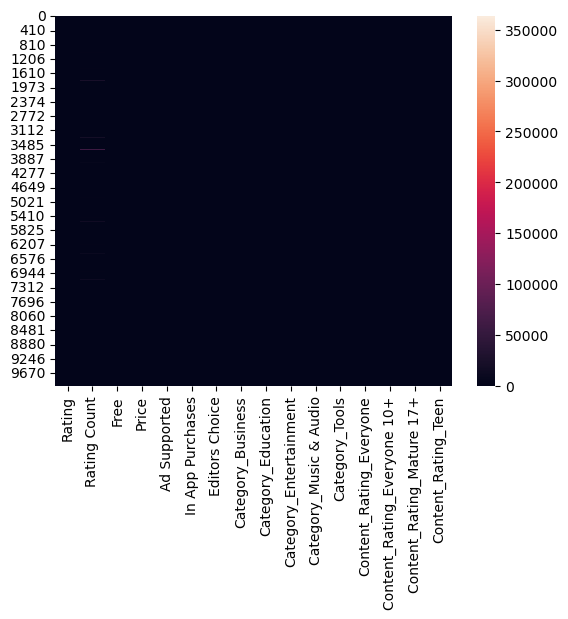

In [262]:
sns.heatmap(data = df)

In [263]:
df.corr()

,Rating,Rating Count,Free,Price,Ad Supported,In App Purchases,Editors Choice,Category_Business,Category_Education,Category_Entertainment,Category_Music & Audio,Category_Tools,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen
Rating,1.000000,0.069650,0.000216,-0.017857,0.138826,0.124844,NaN,-0.176438,0.051418,0.051629,0.022726,0.040222,0.012741,-0.007540,0.002221,-0.013709
Rating Count,0.069650,1.000000,0.007854,-0.001881,0.032646,0.134585,NaN,-0.028675,-0.032073,0.024751,-0.016884,0.061562,-0.008720,0.030578,-0.006604,0.003863
Free,0.000216,0.007854,1.000000,-0.225840,0.126833,0.022706,NaN,0.049824,-0.053946,0.008090,0.051214,-0.047761,-0.030594,0.012646,0.022688,0.018230
Price,-0.017857,-0.001881,-0.225840,1.000000,-0.029480,0.065536,NaN,-0.012492,-0.004911,-0.007331,-0.013625,0.040526,0.009388,-0.002856,-0.005124,-0.007021
Ad Supported,0.138826,0.032646,0.126833,-0.029480,1.000000,0.119538,NaN,-0.372407,-0.103100,0.178015,0.314831,-0.012585,-0.223653,0.060954,0.136069,0.161385
In App Purchases,0.124844,0.134585,0.022706,0.065536,0.119538,1.000000,NaN,-0.074109,0.039557,0.011826,-0.038145,0.056021,0.000290,0.016393,0.018521,-0.016752
Editors Choice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_Business,-0.176438,-0.028675,0.049824,-0.012492,-0.372407,-0.074109,NaN,1.000000,-0.293871,-0.203498,-0.229657,-0.205339,0.108394,-0.019822,-0.059896,-0.085040
Category_Education,0.051418,-0.032073,-0.053946,-0.004911,-0.103100,0.039557,NaN,-0.293871,1.000000,-0.286127,-0.322909,-0.288716,0.173548,-0.008827,-0.098145,-0.142507
Category_Entertainment,0.051629,0.024751,0.008090,-0.007331,0.178015,0.011826,NaN,-0.203498,-0.286127,1.000000,-0.223605,-0.199928,-0.118295,-0.002325,0.114577,0.071826


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3598 entries, 0 to 9998
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rating                       3598 non-null   float64
 1   Rating Count                 3598 non-null   float64
 2   Free                         3598 non-null   int32  
 3   Price                        3598 non-null   float64
 4   Ad Supported                 3598 non-null   int32  
 5   In App Purchases             3598 non-null   int32  
 6   Editors Choice               3598 non-null   int32  
 7   Category_Business            3598 non-null   uint8  
 8   Category_Education           3598 non-null   uint8  
 9   Category_Entertainment       3598 non-null   uint8  
 10  Category_Music & Audio       3598 non-null   uint8  
 11  Category_Tools               3598 non-null   uint8  
 12  Content_Rating_Everyone      3598 non-null   uint8  
 13  Content_Rating_Eve